# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_combined_data = pd.merge(mouse_metadata, study_results, on ='Mouse ID')

# Display the data table for preview
mouse_combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mouse_count = mouse_combined_data["Mouse ID"].nunique()
mouse_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_combined_data[mouse_combined_data.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False )]
duplicate_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_combined_data = mouse_combined_data[(mouse_combined_data['Mouse ID'] != duplicate_mice["Mouse ID"].unique()[0])]

In [8]:
# Checking the number of mice in the clean DataFrame.
len(mouse_combined_data["Mouse ID"].unique())

248

In [9]:
mouse_combined_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
grouped_data = mouse_combined_data.groupby("Drug Regimen")
tumor_stats = grouped_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_stats.columns = ["Mean", "Median", "Variance", "Std. Deviation", "SEM"]
tumor_stats.head()

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

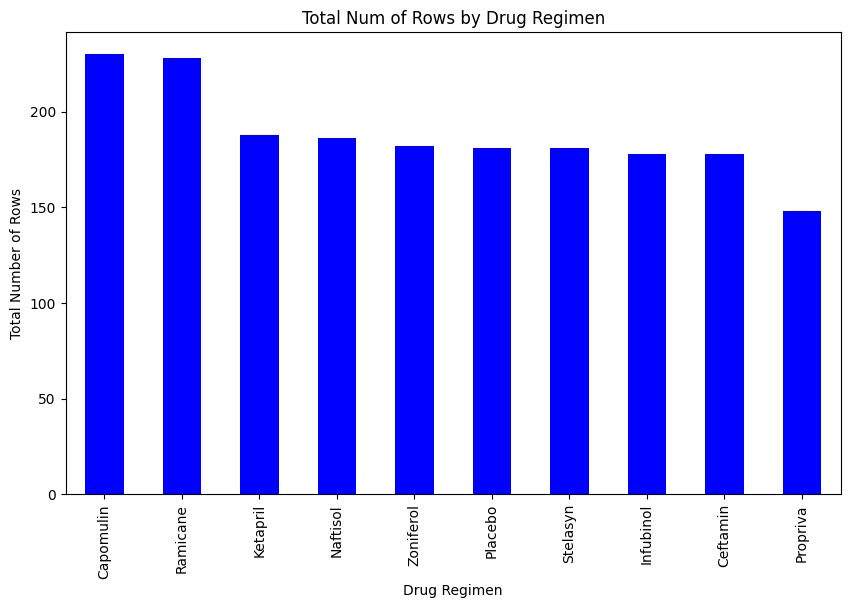

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regiemen_counts = mouse_combined_data["Drug Regimen"].value_counts()
drug_regiemen_counts.plot(kind = "bar", color = "blue", figsize = (10, 6), title = "Total Num Rows")

# plot axies for chart
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.title("Total Num of Rows by Drug Regimen")

# printing chart
plt.show()


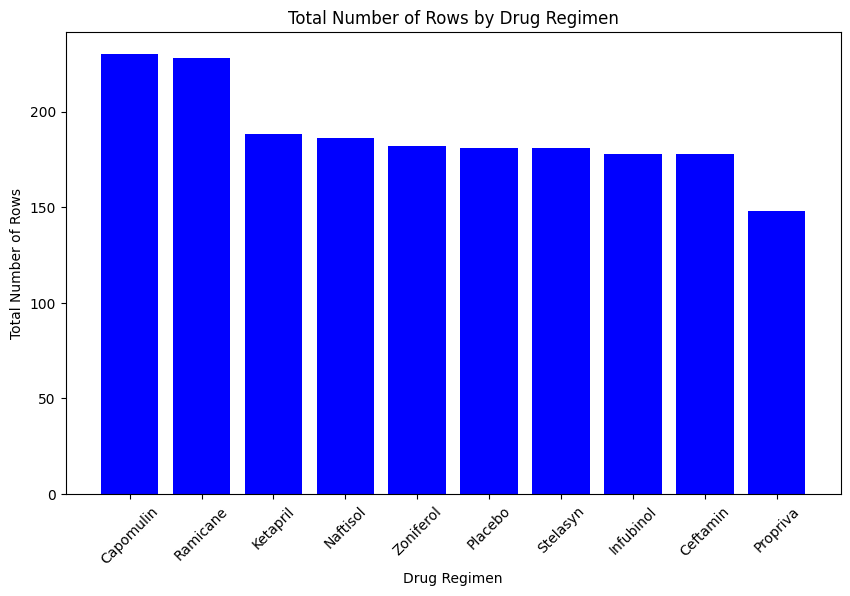

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Using the drug_regimen_counts variable 
drug_regiemen_counts = mouse_combined_data["Drug Regimen"].value_counts()
plt.figure(figsize = (10, 6))
plt.bar(drug_regiemen_counts.index, drug_regiemen_counts.values, color = "blue", )
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.title("Total Number of Rows by Drug Regimen")

# rotate x axis for easier reading 
plt.xticks(rotation = 45)
plt.show()


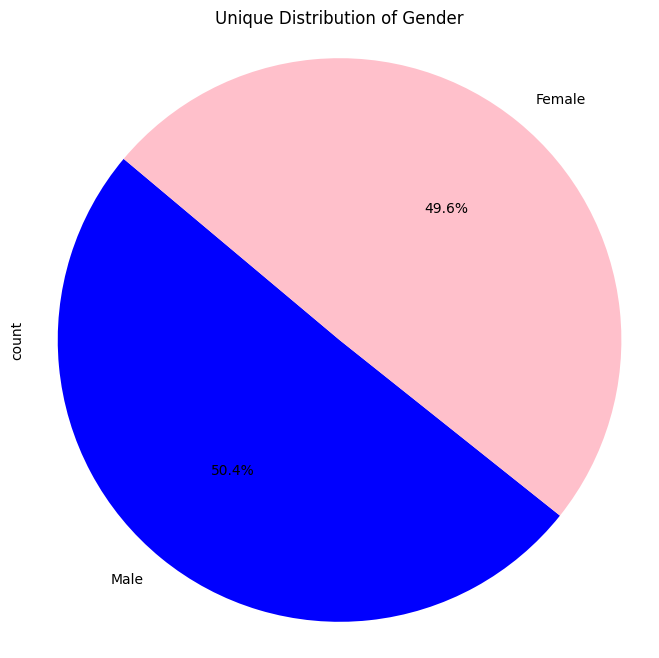

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

# getting the unique vslue counts for the unique gender 
unique_mice = mouse_combined_data.drop_duplicates(subset="Mouse ID")[["Mouse ID", "Sex"]]
gender_distribution = unique_mice["Sex"].value_counts()

# Make the pie chart
gender_distribution.plot(
                        kind = "pie", autopct = "%1.1F%%", colors = ["Blue", "Pink"], 
                         startangle = 140, figsize = (8, 8), title = "Unique Distribution of Gender"
                         )

#set equal aspect ratio to make it easier to read
plt.axis("equal")
plt.show()


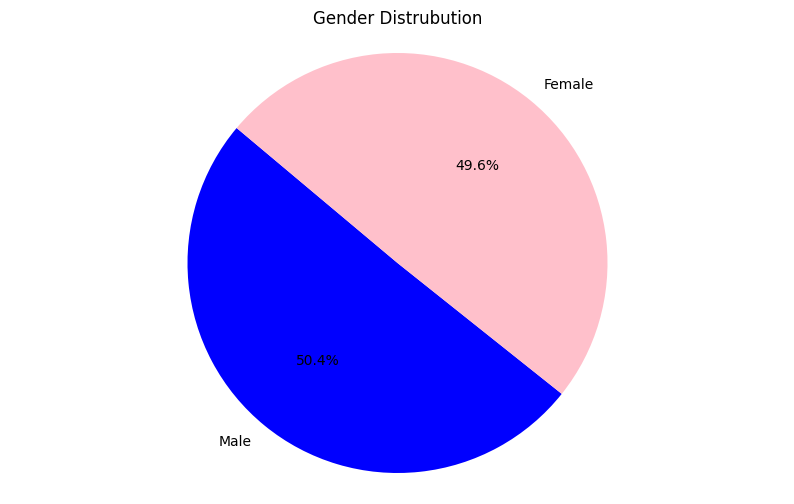

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

# Make the pie chart
plt.figure(figsize = (10, 6))
plt.pie(
        gender_distribution, labels = gender_distribution.index, autopct = "%1.1f%%", 
        startangle = 140, colors = ["Blue", "Pink"]
        )
plt.title("Gender Distrubution")

# set equal aspect ratio for easier reading
plt.axis("equal")
plt.show()

In [24]:
mouse_combined_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# creating a variable to hold the four treatment regimens 
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# group by mouse_id to find the maximum timepoint for each mouse
max_timepoint = mouse_combined_data.groupby("Mouse ID")["Timepoint"].max().reset_index() 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint, mouse_combined_data, on = ["Mouse ID", "Timepoint"])

# create variable to get final tumor volume
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatments)]
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


In [17]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
